# GEQIE FRQI Example

This is the example notebook that presents how to use GEQIE framework for encoding an image into its quantum representation using FRQI method [(Le et al., 2011)](https://link.springer.com/article/10.1007/s11128-010-0177-y). 

## Setup

### Package installation

In [ ]:
! pip install -r "requirements/requirements.in"
! pip install -e ..  # geqie

### Imports

In [9]:
import numpy as np
from PIL import Image, ImageOps

import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
import geqie
from geqie.encodings import frqi

## Encoding

### Opening the image

Opening the test image and normalizing its pixel values to $[0.0, 1.0]$.

In [4]:
image = Image.open("../assets/test_image_4x4.png")
image = ImageOps.grayscale(image)
image = np.asarray(image) / 255.0
image

array([[1.        , 0.        , 1.        , 0.49803922],
       [1.        , 0.        , 0.        , 1.        ],
       [0.76470588, 1.        , 1.        , 1.        ],
       [1.        , 0.76470588, 0.        , 1.        ]])

<Axes: >

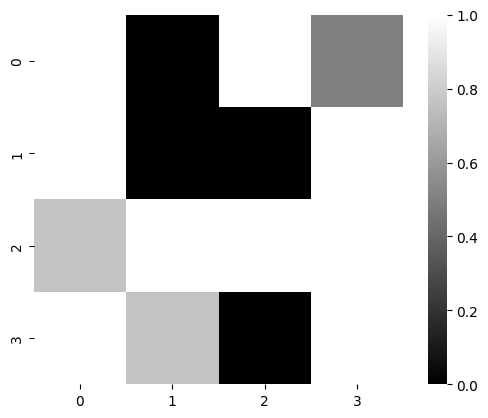

In [5]:
sns.heatmap(image, square=True, cmap="gray")

### Encoding using unitary gate

In [6]:
circuit = geqie.encode(frqi.init_function, frqi.data_function, frqi.map_function, image)
circuit.draw(output='text')

»
   q_0: »
        »
   q_1: »
        »
   q_2: »
        »
   q_3: »
        »
   q_4: »
        »
meas: 5/»
        »
«        ┌──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐»
«   q_0: ┤0                                                                                                                             ├»
«        │                                                                                                                              │»
«   q_1: ┤1                                                                                                                             ├»
«        │                                                                                                                              │»
«   q_2: ┤2 Initialize(0.25,0,0.25,0,0.25,0,0.25,0,0.25,0,0.25,0,0.25,0,0.25,0,0.25,0,0.25,0,0.25,0,0.25,0,0.25,0,0.25,0,0.25,0,0.25,0) ├»
«        │                                                                                                                              │»
«   q_3: ┤3                                                                                                                             ├»
«        │                                                                                                                              │»
«   q_4: ┤4                                                                                                                             ├»
«        └──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┘»
«meas: 5/════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════»
«                                                                                                                                        »
«        ┌──────────┐ ░ ┌─┐            
«   q_0: ┤0         ├─░─┤M├────────────
«        │          │ ░ └╥┘┌─┐         
«   q_1: ┤1         ├─░──╫─┤M├─────────
«        │          │ ░  ║ └╥┘┌─┐      
«   q_2: ┤2 Unitary ├─░──╫──╫─┤M├──────
«        │          │ ░  ║  ║ └╥┘┌─┐   
«   q_3: ┤3         ├─░──╫──╫──╫─┤M├───
«        │          │ ░  ║  ║  ║ └╥┘┌─┐
«   q_4: ┤4         ├─░──╫──╫──╫──╫─┤M├
«        └──────────┘ ░  ║  ║  ║  ║ └╥┘
«meas: 5/════════════════╩══╩══╩══╩══╩═
«                        0  1  2  3  4

### Simulating the circuit

The stemplot represents the number of results for each possible quantum state of the system with decimal basis where, e.g., $\ket{13} \equiv \ket{01101}$.

Text(0, 0.5, 'n_results')

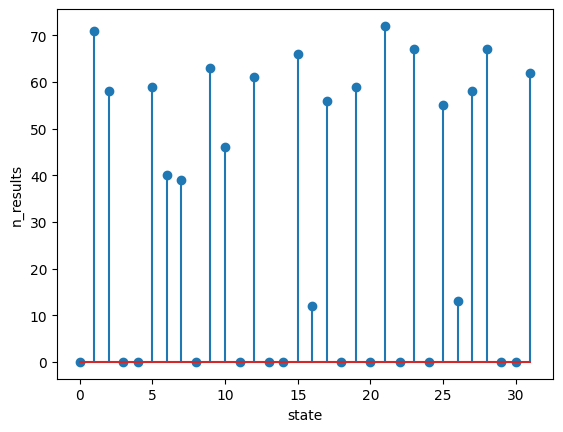

In [7]:
result = geqie.simulate(circuit, 1024)
plt.stem(result.values())
plt.xlabel("state")
plt.ylabel("n_results")

## Retrieving the image

The color is encoded by the last qubit $c$, hence to retrieve the image one has to calculate the average number of resulting $c = \ket{1}$ for each pixel.

In [8]:
ones = np.zeros_like(image)
total = np.zeros_like(image)

for state, n in result.items():
    b = state[:-1]
    c = state[-1]

    m = int(b, base=2)
    total.flat[m] += n
    if c == "1":
        ones.flat[m] += n

print(f"{ones=}")
print(f"{total=}")

ones=array([[71.,  0., 59., 39.],
       [63.,  0.,  0., 66.],
       [56., 59., 72., 67.],
       [55., 58.,  0., 62.]])
total=array([[71., 58., 59., 79.],
       [63., 46., 61., 66.],
       [68., 59., 72., 67.],
       [55., 71., 67., 62.]])


In [9]:
reconstructed = ones / total
reconstructed

array([[1.        , 0.        , 1.        , 0.49367089],
       [1.        , 0.        , 0.        , 1.        ],
       [0.82352941, 1.        , 1.        , 1.        ],
       [1.        , 0.81690141, 0.        , 1.        ]])

### Reconstructed image

<Axes: title={'center': 'original'}>

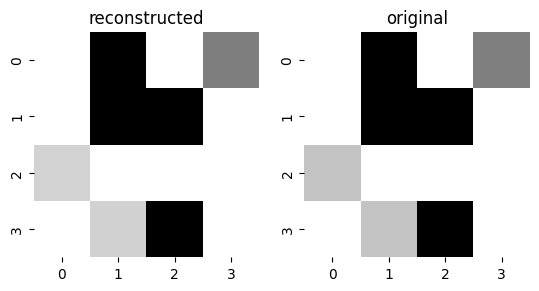

In [10]:
f = plt.figure()
gs = f.add_gridspec(1, 2)

ax = f.add_subplot(gs[0, 0])
ax.set_title("reconstructed")
sns.heatmap(reconstructed, square=True, cmap="gray", cbar=False)

ax = f.add_subplot(gs[0, 1])
ax.set_title("original")
sns.heatmap(image, square=True, cmap="gray", cbar=False)
